In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder

from sklearn.impute import SimpleImputer

from sklearn.compose import make_column_transformer , ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.model_selection import cross_val_score, StratifiedKFold, train_test_split, GridSearchCV

In [2]:
train_df = pd.read_csv("/kaggle/input/titanic-tutorial-dataset/train.csv")
test_df = pd.read_csv("/kaggle/input/titanic-tutorial-dataset/test.csv")

In [3]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
train_df.describe(include ="all")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [6]:
train_df.describe(include =['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [7]:
train_df.groupby(['Pclass'], as_index = False)['Survived'].mean()

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [8]:
train_df.groupby(['Sex'], as_index = False)['Survived'].mean()

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [9]:
train_df.groupby(['SibSp'], as_index = False)['Survived'].mean()

,SibSp,Survived
0,0,0.345395
1,1,0.535885
2,2,0.464286
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [10]:
train_df.groupby(['Parch'], as_index = False)['Survived'].mean()

,Parch,Survived
0,0,0.343658
1,1,0.550847
2,2,0.500000
3,3,0.600000
4,4,0.000000
5,5,0.200000
6,6,0.000000


In [11]:
test_df['Family_Size']=test_df['SibSp']+test_df['Parch']+1
train_df['Family_Size']=train_df['SibSp']+train_df['Parch']+1

In [12]:
train_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_Size
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,1
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,1
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,5
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,3
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,2


In [13]:
train_df.groupby(['Family_Size'], as_index = False)['Survived'].mean()

,Family_Size,Survived
0,1,0.303538
1,2,0.552795
2,3,0.578431
3,4,0.724138
4,5,0.200000
5,6,0.136364
6,7,0.333333
7,8,0.000000
8,11,0.000000


In [18]:
family_map = {1:'Alone', 2:'Small',3:'Small',4:'Small',5:'Medium',6:'Medium',7:'Large',8:'Large',11:'Large'}
train_df['Family_Size_Grouped']= train_df['Family_Size'].map(family_map)
test_df['Family_Size_Grouped']= test_df['Family_Size'].map(family_map)

In [19]:
train_df.groupby(['Family_Size_Grouped'], as_index = False)['Survived'].mean()

,Family_Size_Grouped,Survived
0,Alone,0.303538
1,Large,0.160000
2,Medium,0.162162
3,Small,0.578767


In [20]:
train_df.groupby(['Embarked'], as_index = False)['Survived'].mean()

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


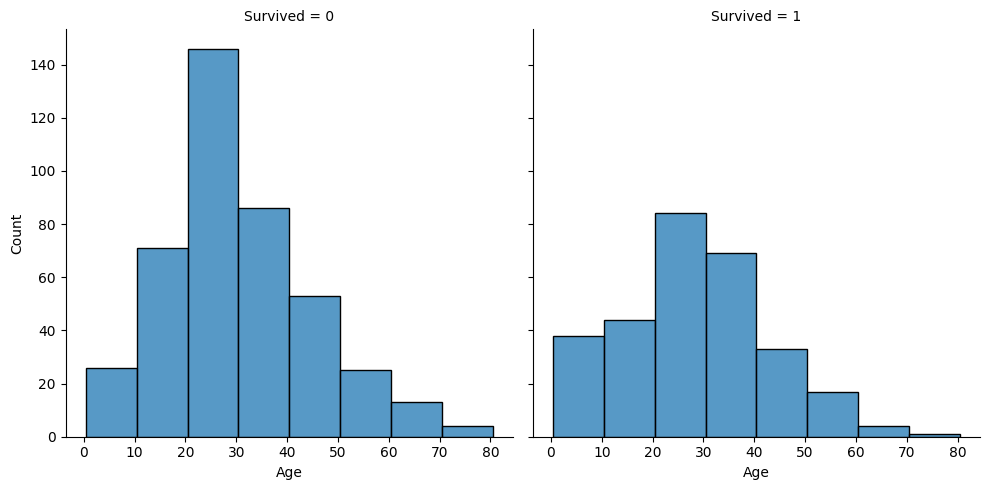

In [21]:
sns.displot(train_df, x='Age', col='Survived', binwidth=10, height=5)

In [22]:
train_df['Age_Cut']=pd.qcut(train_df['Age'],8)
test_df['Age_Cut']=pd.qcut(test_df['Age'],8)

In [23]:
train_df.groupby(['Age_Cut'], as_index = False)['Survived'].mean()

,Age_Cut,Survived
0,"(0.419, 16.0]",0.550000
1,"(16.0, 20.125]",0.341772
2,"(20.125, 24.0]",0.367347
3,"(24.0, 28.0]",0.352941
4,"(28.0, 32.312]",0.416667
5,"(32.312, 38.0]",0.450549
6,"(38.0, 47.0]",0.329545
7,"(47.0, 80.0]",0.415730


In [24]:
train_df.loc[train_df['Age'] <=16, 'Age'] = 0
train_df.loc[(train_df['Age'] >16) & (train_df['Age'] <=20.125), 'Age'] = 1
train_df.loc[(train_df['Age'] >20.125) & (train_df['Age'] <=24), 'Age'] = 2
train_df.loc[(train_df['Age'] >24) & (train_df['Age'] <=28), 'Age'] = 3
train_df.loc[(train_df['Age'] >28) & (train_df['Age'] <=32.125), 'Age'] = 4
train_df.loc[(train_df['Age'] >32.125) & (train_df['Age'] <=38), 'Age'] = 5
train_df.loc[(train_df['Age'] >38) & (train_df['Age'] <=47), 'Age'] = 6
train_df.loc[(train_df['Age'] >47) & (train_df['Age'] <=80), 'Age'] = 7
train_df.loc[train_df['Age'] >80, 'Age']

test_df.loc[test_df['Age'] <=16, 'Age'] = 0
test_df.loc[(test_df['Age'] >16) & (test_df['Age'] <=20.125), 'Age'] = 1
test_df.loc[(test_df['Age'] >20.125) & (test_df['Age'] <=24), 'Age'] = 2
test_df.loc[(test_df['Age'] >24) & (test_df['Age'] <=28), 'Age'] = 3
test_df.loc[(test_df['Age'] >28) & (test_df['Age'] <=32.125), 'Age'] = 4
test_df.loc[(test_df['Age'] >32.125) & (test_df['Age'] <=38), 'Age'] = 5
test_df.loc[(test_df['Age'] >38) & (test_df['Age'] <=47), 'Age'] = 6
test_df.loc[(test_df['Age'] >47) & (test_df['Age'] <=80), 'Age'] = 7
test_df.loc[test_df['Age'] >80, 'Age']

Series([], Name: Age, dtype: float64)

In [25]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_Size,Family_Size_Grouped,Age_Cut
0,892,3,"Kelly, Mr. James",male,5.0,0,0,330911,7.8292,NaN,Q,1,Alone,"(32.0, 39.0]"
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,6.0,1,0,363272,7.0000,NaN,S,2,Small,"(39.0, 48.0]"
2,894,2,"Myles, Mr. Thomas Francis",male,7.0,0,0,240276,9.6875,NaN,Q,1,Alone,"(48.0, 76.0]"
3,895,3,"Wirz, Mr. Albert",male,3.0,0,0,315154,8.6625,NaN,S,1,Alone,"(24.0, 27.0]"
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,2.0,1,1,3101298,12.2875,NaN,S,3,Small,"(21.0, 24.0]"


/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


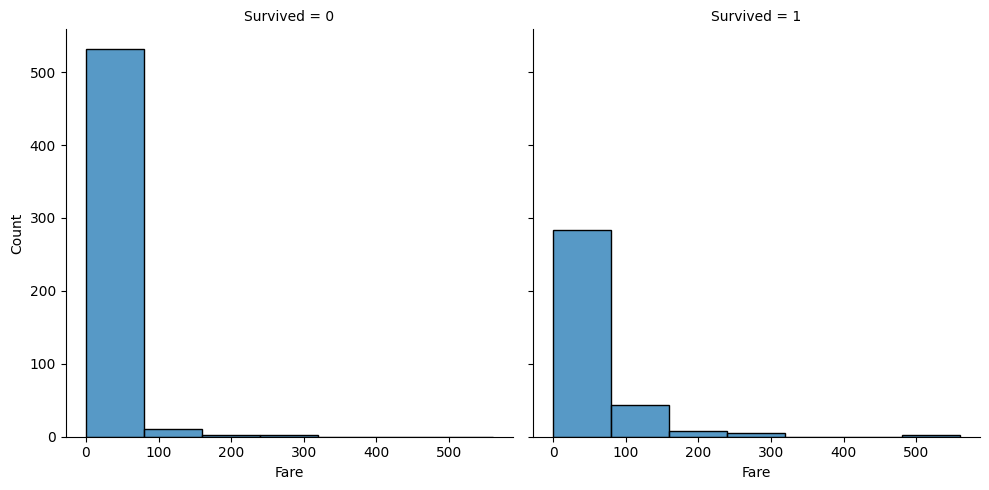

In [26]:
sns.displot(train_df, x='Fare', col= 'Survived', binwidth=80, height=5)

In [27]:
train_df['Fare_Cut']=pd.qcut(train_df['Fare'],6)
test_df['Fare_Cut']=pd.qcut(test_df['Fare'],6)

In [28]:
train_df.groupby(['Fare_Cut'], as_index = False)['Survived'].mean()

,Fare_Cut,Survived
0,"(-0.001, 7.775]",0.205128
1,"(7.775, 8.662]",0.190789
2,"(8.662, 14.454]",0.366906
3,"(14.454, 26.0]",0.436242
4,"(26.0, 52.369]",0.417808
5,"(52.369, 512.329]",0.697987


In [29]:
train_df.loc[train_df['Fare'] <=7.775, 'Fare'] = 0
train_df.loc[(train_df['Fare'] >7.775) & (train_df['Fare'] <=8.662), 'Fare'] = 1
train_df.loc[(train_df['Fare'] >8.662) & (train_df['Fare'] <=14.454), 'Fare'] = 2
train_df.loc[(train_df['Fare'] >14.454) & (train_df['Fare'] <=26), 'Fare'] = 3
train_df.loc[(train_df['Fare'] >26) & (train_df['Fare'] <=52.369), 'Fare'] = 4
train_df.loc[(train_df['Fare'] >52.369) & (train_df['Fare'] <=512.329), 'Fare'] = 5
train_df.loc[train_df['Fare'] >512.329, 'Fare']

test_df.loc[train_df['Fare'] <=7.775, 'Fare'] = 0
test_df.loc[(train_df['Fare'] >7.775) & (train_df['Fare'] <=8.662), 'Fare'] = 1
test_df.loc[(train_df['Fare'] >8.662) & (train_df['Fare'] <=14.454), 'Fare'] = 2
test_df.loc[(train_df['Fare'] >14.454) & (train_df['Fare'] <=26), 'Fare'] = 3
test_df.loc[(train_df['Fare'] >26) & (train_df['Fare'] <=52.369), 'Fare'] = 4
test_df.loc[(train_df['Fare'] >52.369) & (train_df['Fare'] <=512.329), 'Fare'] = 5
test_df.loc[test_df['Fare'] >512.329, 'Fare']

Series([], Name: Fare, dtype: float64)

In [30]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_Size,Family_Size_Grouped,Age_Cut,Fare_Cut
0,892,3,"Kelly, Mr. James",male,5.0,0,0,330911,0.0,NaN,Q,1,Alone,"(32.0, 39.0]","(7.758, 8.662]"
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,6.0,1,0,363272,0.0,NaN,S,2,Small,"(39.0, 48.0]","(-0.001, 7.758]"
2,894,2,"Myles, Mr. Thomas Francis",male,7.0,0,0,240276,0.0,NaN,Q,1,Alone,"(48.0, 76.0]","(8.662, 14.454]"
3,895,3,"Wirz, Mr. Albert",male,3.0,0,0,315154,0.0,NaN,S,1,Alone,"(24.0, 27.0]","(7.758, 8.662]"
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,2.0,1,1,3101298,0.0,NaN,S,3,Small,"(21.0, 24.0]","(8.662, 14.454]"


In [31]:
train_df['Name']

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [32]:
train_df['Title'] = train_df['Name'].str.split(pat=',', expand=True)[1].str.split(pat='.', expand=True)[0].apply(lambda x:x.strip())
test_df['Title'] = train_df['Name'].str.split(pat=',', expand=True)[1].str.split(pat='.', expand=True)[0].apply(lambda x:x.strip())

In [33]:
train_df.groupby(['Title'], as_index = False)['Survived'].mean()

,Title,Survived
0,Capt,0.000000
1,Col,0.500000
2,Don,0.000000
3,Dr,0.428571
4,Jonkheer,0.000000
5,Lady,1.000000
6,Major,0.500000
7,Master,0.575000
8,Miss,0.697802
9,Mlle,1.000000


In [34]:
#Military - Capt,Col, Major
#Noble - Don,Jonkheer, Lady,the Countess,Sir
#Professional - Dr, Rev
#Married male - Mr
#Married female - Mrs, Ms 
#Unmarried Male - Master
#Unmarried Female - Mlle, Miss

In [35]:
train_df['Title'] = train_df['Title'].replace({
    'Capt': 'Military',
    'Col' : 'Military',
    'Major': 'Military',
    'Don': 'Noble',
    'Jonkheer': 'Noble',
    'Lady': 'Noble',
    'the Countess': 'Noble',
    'Sir': 'Noble',
    'Dr': 'Professional',
    'Rev': 'Professional',
    'Mr' : 'Married Male',
    'Mrs' : 'Married Female',
    'Master': 'Unmarried Male',
    'Miss': 'Unmarried Female',
    'Mlle' : 'Unmarried Female',
    'Mme'  : 'Unmarried Female'
})

test_df['Title'] = train_df['Title'].replace({
    'Capt': 'Military',
    'Col' : 'Military',
    'Major': 'Military',
    'Don': 'Noble',
    'Jonkheer': 'Noble',
    'Lady': 'Noble',
    'the Countess': 'Noble',
    'Sir': 'Noble',
    'Dr': 'Professional',
    'Rev': 'Professional',
    'Mr' : 'Married Male',
    'Mrs' : 'Married Female',
    'Master': 'Unmarried Male',
    'Miss': 'Unmarried Female',
    'Mlle' : 'Unmarried Female',  
    'Mme'  : 'Unmarried Female'
})

In [36]:
train_df.groupby(['Title'], as_index = False)['Survived'].mean()

,Title,Survived
0,Married Female,0.792000
1,Married Male,0.156673
2,Military,0.400000
3,Ms,1.000000
4,Noble,0.600000
5,Professional,0.230769
6,Unmarried Female,0.702703
7,Unmarried Male,0.575000


In [37]:
train_df.groupby(['Title'], as_index = False)['Survived'].agg(['count', 'mean'])

,Title,count,mean
0,Married Female,125,0.792000
1,Married Male,517,0.156673
2,Military,5,0.400000
3,Ms,1,1.000000
4,Noble,5,0.600000
5,Professional,13,0.230769
6,Unmarried Female,185,0.702703
7,Unmarried Male,40,0.575000


In [38]:
train_df['Name_Length'] = train_df['Name'].apply(lambda x:len(x))
test_df['Name_Length'] = test_df['Name'].apply(lambda x:len(x))

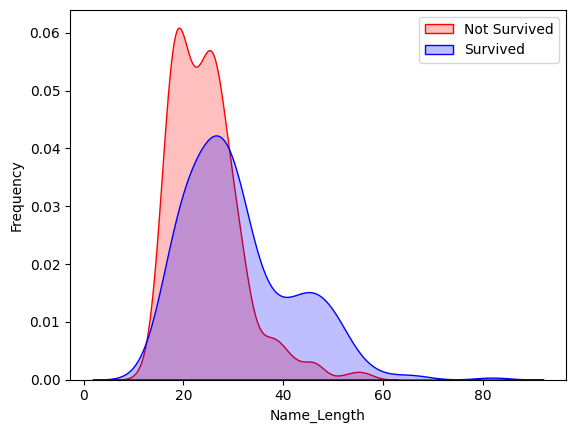

In [39]:
g = sns.kdeplot(train_df['Name_Length'][train_df['Survived']==0 & (train_df['Name_Length'].notnull())] , color = 'Red', fill=True)
g = sns.kdeplot(train_df['Name_Length'][train_df['Survived']==1 & (train_df['Name_Length'].notnull())] , ax=g, color = 'Blue', fill=True)
g.set_xlabel('Name_Length')
g.set_ylabel('Frequency')
g = g.legend(['Not Survived','Survived'])

In [40]:
train_df['Name_LengthGB']=pd.qcut(train_df['Name_Length'],8)
test_df['Name_LengthGB']=pd.qcut(test_df['Name_Length'],8)

In [41]:
train_df.groupby(['Name_LengthGB'], as_index = False)['Survived'].mean()

,Name_LengthGB,Survived
0,"(11.999, 18.0]",0.214286
1,"(18.0, 20.0]",0.252427
2,"(20.0, 23.0]",0.307692
3,"(23.0, 25.0]",0.346939
4,"(25.0, 27.25]",0.292929
5,"(27.25, 30.0]",0.428571
6,"(30.0, 38.0]",0.517241
7,"(38.0, 82.0]",0.745283


In [42]:
train_df.loc[train_df['Name_Length'] <=18, 'Name_Size'] = 0
train_df.loc[(train_df['Name_Length'] >18) & (train_df['Name_Length'] <=20), 'Name_Size'] = 1
train_df.loc[(train_df['Name_Length'] >20) & (train_df['Name_Length'] <=23), 'Name_Size'] = 2
train_df.loc[(train_df['Name_Length'] >23) & (train_df['Name_Length'] <=25), 'Name_Size'] = 3
train_df.loc[(train_df['Name_Length'] >25) & (train_df['Name_Length'] <=27.25), 'Name_Size'] = 4
train_df.loc[(train_df['Name_Length'] >27.25) & (train_df['Name_Length'] <=30), 'Name_Size'] = 5
train_df.loc[(train_df['Name_Length'] >30) & (train_df['Name_Length'] <=38), 'Name_Size'] = 6
train_df.loc[(train_df['Name_Length'] >38) & (train_df['Name_Length'] <=82), 'Name_Size'] = 7
train_df.loc[train_df['Name_Length'] >82, 'Name_Size']

test_df.loc[test_df['Name_Length'] <=18, 'Name_Size'] = 0
test_df.loc[(test_df['Name_Length'] >18) & (test_df['Name_Length'] <=20), 'Name_Size'] = 1
test_df.loc[(test_df['Name_Length'] >20) & (test_df['Name_Length'] <=23), 'Name_Size'] = 2
test_df.loc[(test_df['Name_Length'] >23) & (test_df['Name_Length'] <=25), 'Name_Size'] = 3
test_df.loc[(test_df['Name_Length'] >25) & (test_df['Name_Length'] <=27.25), 'Name_Size'] = 4
test_df.loc[(test_df['Name_Length'] >27.25) & (test_df['Name_Length'] <=30), 'Name_Size'] = 5
test_df.loc[(test_df['Name_Length'] >30) & (test_df['Name_Length'] <=38), 'Name_Size'] = 6
test_df.loc[(test_df['Name_Length'] >38) & (test_df['Name_Length'] <=82), 'Name_Size'] = 7
test_df.loc[test_df['Name_Length'] >82, 'Name_Size']

Series([], Name: Name_Size, dtype: float64)

In [43]:
train_df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_Size,Family_Size_Grouped,Age_Cut,Fare_Cut,Title,Name_Length,Name_LengthGB,Name_Size
0,1,0,3,"Braund, Mr. Owen Harris",male,2.0,1,0,A/5 21171,0.0,NaN,S,2,Small,"(20.125, 24.0]","(-0.001, 7.775]",Married Male,23,"(20.0, 23.0]",2.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,5.0,1,0,PC 17599,5.0,C85,C,2,Small,"(32.312, 38.0]","(52.369, 512.329]",Married Female,51,"(38.0, 82.0]",7.0
2,3,1,3,"Heikkinen, Miss. Laina",female,3.0,0,0,STON/O2. 3101282,1.0,NaN,S,1,Alone,"(24.0, 28.0]","(7.775, 8.662]",Unmarried Female,22,"(20.0, 23.0]",2.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,5.0,1,0,113803,5.0,C123,S,2,Small,"(32.312, 38.0]","(52.369, 512.329]",Married Female,44,"(38.0, 82.0]",7.0
4,5,0,3,"Allen, Mr. William Henry",male,5.0,0,0,373450,1.0,NaN,S,1,Alone,"(32.312, 38.0]","(7.775, 8.662]",Married Male,24,"(23.0, 25.0]",3.0


In [44]:
train_df['Ticket']

0             A/5 21171
1              PC 17599
2      STON/O2. 3101282
3                113803
4                373450
             ...       
886              211536
887              112053
888          W./C. 6607
889              111369
890              370376
Name: Ticket, Length: 891, dtype: object

In [45]:
train_df['TicketNumber'] = train_df['Ticket'].apply(lambda x: pd.Series({'Ticket': x.split()[-1]}))
test_df['TicketNumber'] = test_df['Ticket'].apply(lambda x: pd.Series({'Ticket': x.split()[-1]}))

In [46]:
train_df.groupby(['TicketNumber'], as_index = False)['Survived'].agg(['count', 'mean']).sort_values('count', ascending=0)

,TicketNumber,count,mean
464,347082,7,0.000000
196,2343,7,0.000000
94,1601,7,0.714286
168,2144,6,0.000000
468,347088,6,0.000000
...,...,...,...
271,2662,1,0.000000
272,2663,1,1.000000
273,2664,1,0.000000
276,2667,1,1.000000


In [47]:
train_df['TicketNumberCounts'] = train_df.groupby('TicketNumber')['TicketNumber'].transform('count')
test_df['TicketNumberCounts'] = test_df.groupby('TicketNumber')['TicketNumber'].transform('count')

In [48]:
train_df.groupby(['TicketNumberCounts'], as_index = False)['Survived'].agg(['count', 'mean']).sort_values('count', ascending=0)

,TicketNumberCounts,count,mean
0,1,544,0.295956
1,2,188,0.569149
2,3,66,0.712121
3,4,44,0.500000
6,7,21,0.238095
5,6,18,0.000000
4,5,10,0.000000


In [49]:
train_df['Ticket'].str.split(pat=' ', expand=True)

,0,1,2
0,A/5,21171,None
1,PC,17599,None
2,STON/O2.,3101282,None
3,113803,None,None
4,373450,None,None
...,...,...,...
886,211536,None,None
887,112053,None,None
888,W./C.,6607,None
889,111369,None,None


In [50]:
train_df['TicketLocation'] = np.where(train_df['Ticket'].str.split(pat=' ', expand=True)[1].notna(), train_df['Ticket'].str.split(pat=' ', expand=True)[0].apply(lambda x:x.strip()),'Blank')
test_df['TicketLocation'] = np.where(test_df['Ticket'].str.split(pat=' ', expand=True)[1].notna(), test_df['Ticket'].str.split(pat=' ', expand=True)[0].apply(lambda x:x.strip()),'Blank')

In [51]:
train_df['TicketLocation'].value_counts()

TicketLocation
Blank         665
PC             60
C.A.           27
STON/O         12
A/5            10
W./C.           9
CA.             8
SOTON/O.Q.      8
SOTON/OQ        7
A/5.            7
CA              6
STON/O2.        6
C               5
F.C.C.          5
S.O.C.          5
SC/PARIS        5
SC/Paris        4
S.O./P.P.       3
PP              3
A/4.            3
A/4             3
SC/AH           3
A./5.           2
SOTON/O2        2
A.5.            2
WE/P            2
S.C./PARIS      2
P/PP            2
F.C.            1
SC              1
S.W./PP         1
A/S             1
Fa              1
SCO/W           1
SW/PP           1
W/C             1
S.C./A.4.       1
S.O.P.          1
A4.             1
W.E.P.          1
SO/C            1
S.P.            1
C.A./SOTON      1
Name: count, dtype: int64

In [52]:
train_df['TicketLocation'] = train_df['TicketLocation'].replace({
    'SOTON/O.Q.':'SOTON/OQ',
    'C.A.':'CA',
    'CA.':'CA',
    'SC/PARIS':'SC/Paris',
    'S.C./PARIS':'SC/Paris',
    'A/4.':'A/4',
    'A/5.':'A/5',
    'A.5.':'A/5',
    'A./5.':'A/5',
    'W./C.':'W/C'    
})

test_df['TicketLocation'] = test_df['TicketLocation'].replace({
    'SOTON/O.Q.':'SOTON/OQ',
    'C.A.':'CA',
    'CA.':'CA',
    'SC/PARIS':'SC/Paris',
    'S.C./PARIS':'SC/Paris',
    'A/4.':'A/4',
    'A/5.':'A/5',
    'A.5.':'A/5',
    'A./5.':'A/5',
    'W./C.':'W/C'   
})

In [53]:
train_df.groupby(['TicketLocation'], as_index = False)['Survived'].agg(['count', 'mean'])

,TicketLocation,count,mean
0,A/4,6,0.000000
1,A/5,21,0.095238
2,A/S,1,0.000000
3,A4.,1,0.000000
4,Blank,665,0.383459
5,C,5,0.400000
6,C.A./SOTON,1,0.000000
7,CA,41,0.341463
8,F.C.,1,0.000000
9,F.C.C.,5,0.800000


In [54]:
#Ticket -- Discarded as 'Blank' is a mean for us

In [55]:
train_df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Family_Size_Grouped,Age_Cut,Fare_Cut,Title,Name_Length,Name_LengthGB,Name_Size,TicketNumber,TicketNumberCounts,TicketLocation
0,1,0,3,"Braund, Mr. Owen Harris",male,2.0,1,0,A/5 21171,0.0,...,Small,"(20.125, 24.0]","(-0.001, 7.775]",Married Male,23,"(20.0, 23.0]",2.0,21171,1,A/5
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,5.0,1,0,PC 17599,5.0,...,Small,"(32.312, 38.0]","(52.369, 512.329]",Married Female,51,"(38.0, 82.0]",7.0,17599,1,PC
2,3,1,3,"Heikkinen, Miss. Laina",female,3.0,0,0,STON/O2. 3101282,1.0,...,Alone,"(24.0, 28.0]","(7.775, 8.662]",Unmarried Female,22,"(20.0, 23.0]",2.0,3101282,1,STON/O2.
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,5.0,1,0,113803,5.0,...,Small,"(32.312, 38.0]","(52.369, 512.329]",Married Female,44,"(38.0, 82.0]",7.0,113803,2,Blank
4,5,0,3,"Allen, Mr. William Henry",male,5.0,0,0,373450,1.0,...,Alone,"(32.312, 38.0]","(7.775, 8.662]",Married Male,24,"(23.0, 25.0]",3.0,373450,1,Blank


In [56]:
train_df.isnull().sum()

PassengerId              0
Survived                 0
Pclass                   0
Name                     0
Sex                      0
Age                    177
SibSp                    0
Parch                    0
Ticket                   0
Fare                     0
Cabin                  687
Embarked                 2
Family_Size              0
Family_Size_Grouped      0
Age_Cut                177
Fare_Cut                 0
Title                    0
Name_Length              0
Name_LengthGB            0
Name_Size                0
TicketNumber             0
TicketNumberCounts       0
TicketLocation           0
dtype: int64

In [57]:
train_df['Cabin'] = train_df['Cabin'].fillna('U')
train_df['Cabin'] = pd.Series([i[0] if not pd.isnull(i) else 'x' for i in train_df['Cabin']])

test_df['Cabin'] = test_df['Cabin'].fillna('U')
test_df['Cabin'] = pd.Series([i[0] if not pd.isnull(i) else 'x' for i in test_df['Cabin']])

In [58]:
train_df.groupby(['Cabin'], as_index = False)['Survived'].agg(['count', 'mean'])

,Cabin,count,mean
0,A,15,0.466667
1,B,47,0.744681
2,C,59,0.593220
3,D,33,0.757576
4,E,32,0.750000
5,F,13,0.615385
6,G,4,0.500000
7,T,1,0.000000
8,U,687,0.299854


In [59]:
train_df['Cabin_Assigned'] = train_df['Cabin'].apply(lambda x: 0 if x in ['U'] else 1)
test_df['Cabin_Assigned'] = test_df['Cabin'].apply(lambda x: 0 if x in ['U'] else 1)

In [60]:
train_df.groupby(['Cabin_Assigned'], as_index = False)['Survived'].agg(['count', 'mean'])

,Cabin_Assigned,count,mean
0,0,687,0.299854
1,1,204,0.666667


In [61]:
train_df.shape
#test_df.shape

(891, 24)

In [62]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Family_Size',
       'Family_Size_Grouped', 'Age_Cut', 'Fare_Cut', 'Title', 'Name_Length',
       'Name_LengthGB', 'Name_Size', 'TicketNumber', 'TicketNumberCounts',
       'TicketLocation', 'Cabin_Assigned'],
      dtype='object')

In [63]:
test_df.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked', 'Family_Size',
       'Family_Size_Grouped', 'Age_Cut', 'Fare_Cut', 'Title', 'Name_Length',
       'Name_LengthGB', 'Name_Size', 'TicketNumber', 'TicketNumberCounts',
       'TicketLocation', 'Cabin_Assigned'],
      dtype='object')

In [64]:
train_df['Age'].fillna(train_df['Age'].mean(), inplace=True)
test_df['Age'].fillna(test_df['Age'].mean(), inplace=True)
test_df['Fare'].fillna(test_df['Fare'].mean(), inplace=True)

In [65]:
ohe = OneHotEncoder(sparse_output=False)
ode = OrdinalEncoder
SI = SimpleImputer(strategy='most_frequent')

In [66]:
ode_cols = ['Family_Size_Grouped']
ohe_cols = ['Sex', 'Embarked']

In [67]:
X = train_df.drop(['Survived'], axis=1)
y = train_df['Survived']
X_test = test_df.drop(['Age_Cut', 'Fare_Cut'], axis=1)

In [68]:
X

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,...,Age_Cut,Fare_Cut,Title,Name_Length,Name_LengthGB,Name_Size,TicketNumber,TicketNumberCounts,TicketLocation,Cabin_Assigned
0,1,3,"Braund, Mr. Owen Harris",male,2.000000,1,0,A/5 21171,0.0,U,...,"(20.125, 24.0]","(-0.001, 7.775]",Married Male,23,"(20.0, 23.0]",2.0,21171,1,A/5,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,5.000000,1,0,PC 17599,5.0,C,...,"(32.312, 38.0]","(52.369, 512.329]",Married Female,51,"(38.0, 82.0]",7.0,17599,1,PC,1
2,3,3,"Heikkinen, Miss. Laina",female,3.000000,0,0,STON/O2. 3101282,1.0,U,...,"(24.0, 28.0]","(7.775, 8.662]",Unmarried Female,22,"(20.0, 23.0]",2.0,3101282,1,STON/O2.,0
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,5.000000,1,0,113803,5.0,C,...,"(32.312, 38.0]","(52.369, 512.329]",Married Female,44,"(38.0, 82.0]",7.0,113803,2,Blank,1
4,5,3,"Allen, Mr. William Henry",male,5.000000,0,0,373450,1.0,U,...,"(32.312, 38.0]","(7.775, 8.662]",Married Male,24,"(23.0, 25.0]",3.0,373450,1,Blank,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,2,"Montvila, Rev. Juozas",male,3.000000,0,0,211536,2.0,U,...,"(24.0, 28.0]","(8.662, 14.454]",Professional,21,"(20.0, 23.0]",2.0,211536,1,Blank,0
887,888,1,"Graham, Miss. Margaret Edith",female,1.000000,0,0,112053,4.0,B,...,"(16.0, 20.125]","(26.0, 52.369]",Unmarried Female,28,"(27.25, 30.0]",5.0,112053,1,Blank,1
888,889,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,3.462185,1,2,W./C. 6607,3.0,U,...,NaN,"(14.454, 26.0]",Unmarried Female,40,"(38.0, 82.0]",7.0,6607,2,W/C,0
889,890,1,"Behr, Mr. Karl Howell",male,3.000000,0,0,111369,4.0,C,...,"(24.0, 28.0]","(26.0, 52.369]",Married Male,21,"(20.0, 23.0]",2.0,111369,1,Blank,1


In [69]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [70]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, stratify = y, random_state=21)

In [71]:
ordinal_pipeline = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='most_frequent')),
    ('ord', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))
])

In [72]:
ohe_pipeline = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='most_frequent')),
    ('one-hot', OneHotEncoder(handle_unknown = 'ignore', sparse_output=False))
])

In [73]:
col_trans = ColumnTransformer(transformers=[
    ('impute', SI, ['Age']),
    ('ord_pipeline', ordinal_pipeline, ode_cols),
    ('ohe_pipeline', ohe_pipeline, ohe_cols),
    ('passthrough', 'passthrough', ['Pclass', 'TicketNumberCounts', 'Cabin_Assigned', 'Name_Size', 'Age', 'Fare'])
    ],
    remainder='drop',
    n_jobs=-1)

In [74]:
rfc = RandomForestClassifier()

In [75]:
param_grid = {
    'n_estimators': [100, 150, 200],
    'min_samples_split': [5, 10, 15],
    'max_depth': [8, 9, 10, 15, 20],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy'],
}

In [76]:
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=StratifiedKFold(n_splits=5))

In [77]:
X_train

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,...,Age_Cut,Fare_Cut,Title,Name_Length,Name_LengthGB,Name_Size,TicketNumber,TicketNumberCounts,TicketLocation,Cabin_Assigned
67,68,3,"Crease, Mr. Ernest James",male,1.000000,0,0,S.P. 3464,1.0,U,...,"(16.0, 20.125]","(7.775, 8.662]",Married Male,24,"(23.0, 25.0]",3.0,3464,1,S.P.,0
154,155,3,"Olsen, Mr. Ole Martin",male,3.462185,0,0,Fa 265302,0.0,U,...,NaN,"(-0.001, 7.775]",Married Male,21,"(20.0, 23.0]",2.0,265302,1,Fa,0
883,884,2,"Banfield, Mr. Frederick James",male,3.000000,0,0,C.A./SOTON 34068,2.0,U,...,"(24.0, 28.0]","(8.662, 14.454]",Married Male,29,"(27.25, 30.0]",5.0,34068,1,C.A./SOTON,0
499,500,3,"Svensson, Mr. Olof",male,2.000000,0,0,350035,1.0,U,...,"(20.125, 24.0]","(7.775, 8.662]",Married Male,18,"(11.999, 18.0]",0.0,350035,1,Blank,0
519,520,3,"Pavlovic, Mr. Stefo",male,4.000000,0,0,349242,1.0,U,...,"(28.0, 32.312]","(7.775, 8.662]",Married Male,19,"(18.0, 20.0]",1.0,349242,1,Blank,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
574,575,3,"Rush, Mr. Alfred George John",male,0.000000,0,0,A/4. 20589,1.0,U,...,"(0.419, 16.0]","(7.775, 8.662]",Married Male,28,"(27.25, 30.0]",5.0,20589,1,A/4,0
247,248,2,"Hamalainen, Mrs. William (Anna)",female,2.000000,0,2,250649,3.0,U,...,"(20.125, 24.0]","(14.454, 26.0]",Married Female,31,"(30.0, 38.0]",6.0,250649,2,Blank,0
188,189,3,"Bourke, Mr. John",male,6.000000,1,1,364849,3.0,U,...,"(38.0, 47.0]","(14.454, 26.0]",Married Male,16,"(11.999, 18.0]",0.0,364849,2,Blank,0
328,329,3,"Goldsmith, Mrs. Frank John (Emily Alice Brown)",female,4.000000,1,1,363291,3.0,U,...,"(28.0, 32.312]","(14.454, 26.0]",Married Female,46,"(38.0, 82.0]",7.0,363291,3,Blank,0


In [78]:
y_train

67     0
154    0
883    0
499    0
519    0
      ..
574    0
247    1
188    0
328    1
206    0
Name: Survived, Length: 712, dtype: int64

In [79]:
pipefinalrfc = make_pipeline(col_trans, CV_rfc)
pipefinalrfc.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(n_jobs=-1,
                                   transformers=[('impute',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  ['Age']),
                                                 ('ord_pipeline',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ord',
                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1))]),
                                                  ['Family_Size_Grouped']),
                                                 ('ohe_pipeline',
                                                  Pipeline(s...
                                                   'TicketNumberCounts',
                                                   'Cabin_Assigned',
                                                   'Name_Size', 'Age',
                                                   'Fare'])])),
                ('gridsearchcv',
                 GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                              estimator=RandomForestClassifier(),
                              param_grid={'criterion': ['gini', 'entropy'],
                                          'max_depth': [8, 9, 10, 15, 20],
                                          'min_samples_leaf': [1, 2, 4],
                                          'min_samples_split': [5, 10, 15],
                                          'n_estimators': [100, 150, 200]}))])

In [80]:
print(CV_rfc.best_params_)
print(CV_rfc.best_score_)

{'criterion': 'gini', 'max_depth': 9, 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 150}
0.8286713286713286


In [81]:
dtc = DecisionTreeClassifier()

In [82]:
param_grid = {
    'min_samples_split': [5, 10, 15],
    'max_depth': [10, 20, 30],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy'],
}

In [83]:
CV_dtc = GridSearchCV(estimator=dtc, param_grid=param_grid, cv=StratifiedKFold(n_splits=5))


In [84]:
pipefinaldtc = make_pipeline(col_trans, CV_dtc)
pipefinaldtc.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(n_jobs=-1,
                                   transformers=[('impute',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  ['Age']),
                                                 ('ord_pipeline',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ord',
                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1))]),
                                                  ['Family_Size_Grouped']),
                                                 ('ohe_pipeline',
                                                  Pipeline(s...
                                                 ('passthrough', 'passthrough',
                                                  ['Pclass',
                                                   'TicketNumberCounts',
                                                   'Cabin_Assigned',
                                                   'Name_Size', 'Age',
                                                   'Fare'])])),
                ('gridsearchcv',
                 GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                              estimator=DecisionTreeClassifier(),
                              param_grid={'criterion': ['gini', 'entropy'],
                                          'max_depth': [10, 20, 30],
                                          'min_samples_leaf': [1, 2, 4],
                                          'min_samples_split': [5, 10, 15]}))])

In [85]:
print(CV_dtc.best_params_)
print(CV_dtc.best_score_)

{'criterion': 'gini', 'max_depth': 20, 'min_samples_leaf': 4, 'min_samples_split': 15}
0.8159854230276766


In [86]:
knn = KNeighborsClassifier()

In [87]:
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'p': [1,2],
}

In [88]:
CV_knn = GridSearchCV(estimator=knn, param_grid=param_grid, cv=StratifiedKFold(n_splits=5))


In [89]:
pipefinalknn = make_pipeline(col_trans, CV_knn)
pipefinalknn.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(n_jobs=-1,
                                   transformers=[('impute',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  ['Age']),
                                                 ('ord_pipeline',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ord',
                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1))]),
                                                  ['Family_Size_Grouped']),
                                                 ('ohe_pipeline',
                                                  Pipeline(s...
                                                 ('passthrough', 'passthrough',
                                                  ['Pclass',
                                                   'TicketNumberCounts',
                                                   'Cabin_Assigned',
                                                   'Name_Size', 'Age',
                                                   'Fare'])])),
                ('gridsearchcv',
                 GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                              estimator=KNeighborsClassifier(),
                              param_grid={'algorithm': ['auto', 'ball_tree',
                                                        'kd_tree', 'brute'],
                                          'n_neighbors': [3, 5, 7, 9, 11],
                                          'p': [1, 2],
                                          'weights': ['uniform',
                                                      'distance']}))])

In [90]:
print(CV_knn.best_params_)
print(CV_knn.best_score_)

{'algorithm': 'brute', 'n_neighbors': 11, 'p': 1, 'weights': 'uniform'}
0.8033881611346401


In [91]:
svc = SVC(probability=True)

In [92]:
param_grid = {
    'C': [100,10, 1.0, 0.1, 0.001, 0.001],
    'kernel':['linear', 'poly', 'rbf', 'sigmoid'],
}

In [93]:
CV_svc = GridSearchCV(estimator=svc, param_grid=param_grid, cv=StratifiedKFold(n_splits=5))


In [94]:
pipefinalsvc = make_pipeline(col_trans, CV_svc)
pipefinalsvc.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(n_jobs=-1,
                                   transformers=[('impute',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  ['Age']),
                                                 ('ord_pipeline',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ord',
                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1))]),
                                                  ['Family_Size_Grouped']),
                                                 ('ohe_pipeline',
                                                  Pipeline(s...
                                                                                 sparse_output=False))]),
                                                  ['Sex', 'Embarked']),
                                                 ('passthrough', 'passthrough',
                                                  ['Pclass',
                                                   'TicketNumberCounts',
                                                   'Cabin_Assigned',
                                                   'Name_Size', 'Age',
                                                   'Fare'])])),
                ('gridsearchcv',
                 GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                              estimator=SVC(probability=True),
                              param_grid={'C': [100, 10, 1.0, 0.1, 0.001,
                                                0.001],
                                          'kernel': ['linear', 'poly', 'rbf',
                                                     'sigmoid']}))])

In [95]:
print(CV_svc.best_params_)
print(CV_svc.best_score_)

{'C': 10, 'kernel': 'rbf'}
0.7991529597163399


In [96]:
lr = LogisticRegression()

In [97]:
param_grid = {
    'C': [100,10, 1.0, 0.1, 0.001, 0.001],
}

In [98]:
CV_lr = GridSearchCV(estimator=lr, param_grid=param_grid, cv=StratifiedKFold(n_splits=5))


In [99]:
pipefinallr= make_pipeline(col_trans, CV_lr)
pipefinallr.fit(X_train, y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(n_jobs=-1,
                                   transformers=[('impute',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  ['Age']),
                                                 ('ord_pipeline',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ord',
                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1))]),
                                                  ['Family_Size_Grouped']),
                                                 ('ohe_pipeline',
                                                  Pipeline(s...
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['Sex', 'Embarked']),
                                                 ('passthrough', 'passthrough',
                                                  ['Pclass',
                                                   'TicketNumberCounts',
                                                   'Cabin_Assigned',
                                                   'Name_Size', 'Age',
                                                   'Fare'])])),
                ('gridsearchcv',
                 GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                              estimator=LogisticRegression(),
                              param_grid={'C': [100, 10, 1.0, 0.1, 0.001,
                                                0.001]}))])

In [100]:
print(CV_lr.best_params_)
print(CV_lr.best_score_)

{'C': 0.1}
0.8048163104501134


In [101]:
gnb = GaussianNB()

In [102]:
param_grid = {
    'var_smoothing': [0.00000001, 0.000000001, 0.00000001],
}

In [103]:
CV_gnb = GridSearchCV(estimator=gnb, param_grid=param_grid, cv=StratifiedKFold(n_splits=5))


In [104]:
pipefinalgnb= make_pipeline(col_trans, CV_gnb)
pipefinalgnb.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(n_jobs=-1,
                                   transformers=[('impute',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  ['Age']),
                                                 ('ord_pipeline',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ord',
                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1))]),
                                                  ['Family_Size_Grouped']),
                                                 ('ohe_pipeline',
                                                  Pipeline(s...
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['Sex', 'Embarked']),
                                                 ('passthrough', 'passthrough',
                                                  ['Pclass',
                                                   'TicketNumberCounts',
                                                   'Cabin_Assigned',
                                                   'Name_Size', 'Age',
                                                   'Fare'])])),
                ('gridsearchcv',
                 GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                              estimator=GaussianNB(),
                              param_grid={'var_smoothing': [1e-08, 1e-09,
                                                            1e-08]}))])

In [105]:
print(CV_gnb.best_params_)
print(CV_gnb.best_score_)

{'var_smoothing': 1e-09}
0.7795035949965528


In [106]:
Y_pred = pipefinalrfc.predict(X_test)
Y_pred2 = pipefinaldtc.predict(X_test)
Y_pred3 = pipefinalknn.predict(X_test)
Y_pred4 = pipefinalsvc.predict(X_test)
Y_pred5 = pipefinallr.predict(X_test)
Y_pred6 = pipefinalgnb.predict(X_test)

In [107]:
submission = pd.DataFrame({
    'PassengerId': test_df['PassengerId'],
    'Survived': Y_pred
})

submission2 = pd.DataFrame({
    'PassengerId': test_df['PassengerId'],
    'Survived': Y_pred2
})

submission3 = pd.DataFrame({
    'PassengerId': test_df['PassengerId'],
    'Survived': Y_pred3
})

submission4 = pd.DataFrame({
    'PassengerId': test_df['PassengerId'],
    'Survived': Y_pred4
})

submission5 = pd.DataFrame({
    'PassengerId': test_df['PassengerId'],
    'Survived': Y_pred5
})

submission6 = pd.DataFrame({
    'PassengerId': test_df['PassengerId'],
    'Survived': Y_pred6
})


In [109]:
submission.to_csv('/kaggle/working/submission1.csv', index=False)
submission2.to_csv('/kaggle/working/submission2.csv', index=False)
submission3.to_csv('/kaggle/working/submission3.csv', index=False)
submission4.to_csv('/kaggle/working/submission4.csv', index=False)
submission5.to_csv('/kaggle/working/submission5.csv', index=False)
submission6.to_csv('/kaggle/working/submission6.csv', index=False)